# Workshop 09
# Multiple Variables Linear Regression

In [183]:
#ID 116510905109-4
# กฤษนัย บุญนาค

Multiple regression is like linear regression, but with more than one independent value, meaning that we try to predict a value based on two or more variables.

Take a look at the data set below, it contains some information about cars.

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('data_cars.csv')
data

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105
5,VW,Up!,1000,929,105
6,Skoda,Fabia,1400,1109,90
7,Mercedes,A-Class,1500,1365,92
8,Ford,Fiesta,1500,1112,98
9,Audi,A1,1600,1150,99


We can predict the CO2 emission of a car based on the size of the engine, but with multiple regression we can throw in more variables, like the weight of the car, to make the prediction more accurate.

[Text(0.5, 0, 'Weight'), Text(0, 0.5, 'CO2')]

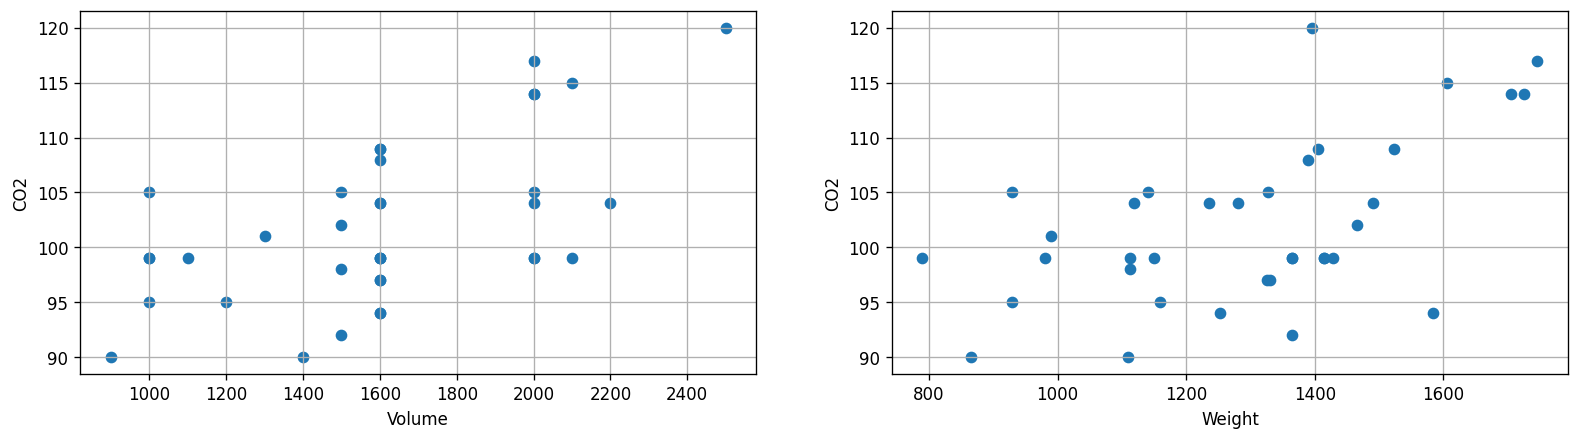

In [62]:
volume = data['Volume']
weight = data['Weight']
co2 = data['CO2']

fig, axis = plt.subplots(1, 2, figsize=(16, 4), dpi=120) #กำหนดจำนวนแถวและคอลัมน์ของแผนภูมิ (ในที่นี้คือ 1 แถวและ 2 คอลัมน์)
#dpi จำนวนจุดต่อนิ้ว กำหนดความละเอียดของรูปภาพที่สร้างขึ้น ในที่นี้กำหนดให้มีความละเอียดเป็น 120 จุดต่อนิ้ว

axis[0].grid()
axis[0].set(xlabel='Volume', ylabel='CO2')
axis[1].scatter(weight, co2)
axis[1].grid()
axis[1].set(xlabel='Weight', ylabel='CO2')

### Multiple Linear Regression Model

$$ \hat{y} = B_0 + B_1x_1 + B_2x_2 + \ldots + B_nx_n $$

where 
$$ B = (X^{T}X)^{-1}X^{T}Y, $$
$$ X = \begin{bmatrix} 1 & x_{11} & x_{12} & ... & x_{1n} \\ 1 & x_{21} & x_{22} & ... & x_{2n} \\ \vdots & \vdots & \vdots & \vdots & \vdots \\ 1 & x_{m1} & x_{m2} & ... & x_{mn} \end{bmatrix}, B = \begin{bmatrix} B_0 \\ B_1 \\ B_2 \\ \vdots \\ B_n \end{bmatrix}, Y = \begin{bmatrix} y_1 \\ y_2 \\ y_3 \\ \vdots \\ y_m \end{bmatrix}, $$

In [63]:
x1 = volume.to_numpy()
x2 = weight.to_numpy()
y = co2.to_numpy()

n = x1.shape[0]
ones = np.ones(n)
ones = ones.reshape(n, 1)
x1 = x1.reshape(n, 1)
x2 = x2.reshape(n, 1)

Y = y.reshape(n, 1)
X = np.concatenate((ones, x1, x2), axis=1)
print(X)

[[1.000e+00 1.000e+03 7.900e+02]
 [1.000e+00 1.200e+03 1.160e+03]
 [1.000e+00 1.000e+03 9.290e+02]
 [1.000e+00 9.000e+02 8.650e+02]
 [1.000e+00 1.500e+03 1.140e+03]
 [1.000e+00 1.000e+03 9.290e+02]
 [1.000e+00 1.400e+03 1.109e+03]
 [1.000e+00 1.500e+03 1.365e+03]
 [1.000e+00 1.500e+03 1.112e+03]
 [1.000e+00 1.600e+03 1.150e+03]
 [1.000e+00 1.100e+03 9.800e+02]
 [1.000e+00 1.300e+03 9.900e+02]
 [1.000e+00 1.000e+03 1.112e+03]
 [1.000e+00 1.600e+03 1.252e+03]
 [1.000e+00 1.600e+03 1.326e+03]
 [1.000e+00 1.600e+03 1.330e+03]
 [1.000e+00 1.600e+03 1.365e+03]
 [1.000e+00 2.200e+03 1.280e+03]
 [1.000e+00 1.600e+03 1.119e+03]
 [1.000e+00 2.000e+03 1.328e+03]
 [1.000e+00 1.600e+03 1.584e+03]
 [1.000e+00 2.000e+03 1.428e+03]
 [1.000e+00 2.100e+03 1.365e+03]
 [1.000e+00 1.600e+03 1.415e+03]
 [1.000e+00 2.000e+03 1.415e+03]
 [1.000e+00 1.500e+03 1.465e+03]
 [1.000e+00 2.000e+03 1.490e+03]
 [1.000e+00 2.000e+03 1.725e+03]
 [1.000e+00 1.600e+03 1.523e+03]
 [1.000e+00 2.000e+03 1.705e+03]
 [1.000e+0

In [64]:
B = np.linalg.inv(X.T @ X) @ X.T @ Y
print(B)

[[7.96947193e+01]
 [7.80525753e-03]
 [7.55094727e-03]]


In [65]:
print(f'Model is \n yhat = {B[0]} + {B[1]}*x1 + {B[2]}*x2')

Model is 
 yhat = [79.69471929] + [0.00780526]*x1 + [0.00755095]*x2


In [66]:
def model(x1, x2):
    yhat = B[0] + B[1]*x1 + B[2]*x2
    return yhat

### Prediction

We can use the model to predict the CO2 emission of an unknown car where the volume is 1,300 cc, and the weight is 2,300 kg.

In [67]:
car_volume = 1300
car_weight = 2300
car_co2 = model(car_volume, car_weight)
print(f'Predict: co2 = {car_co2}')

Predict: co2 = [107.2087328]


### Coefficient of Determination (r2)

$$ r^2 = \dfrac{S_t - S_r}{S_t}, $$
where
$$ S_r = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 \text{ and } S_t = \sum_{i=1}^{n} (y_i - \bar{y})^2 $$

In [71]:
y = Y
yhat = model(x1, x2)

S_r = sum((y-yhat) ** 2)

ybar = np.average(y)
S_t = sum((y-ybar) ** 2)

r2 = (S_t - S_r)/S_t

print(f'Coefficient of Determination: r2 = {r2}')

Coefficient of Determination: r2 = [0.3765564]


------------------
## Problem 01

Use the dataset ```data_houses.csv```, to answer the following questions.

#### A) Find a regression model to predict the house price based on its size and the number of bedrooms

In [161]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


data = pd.read_csv('data_houses.csv')
data

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900
5,1985,4,299900
6,1534,3,314900
7,1427,3,198999
8,1380,3,212000
9,1494,3,242500


Model is 
 yhat = [89597.9095428] + [139.21067402]*x1 + [-8738.01911233]*x2


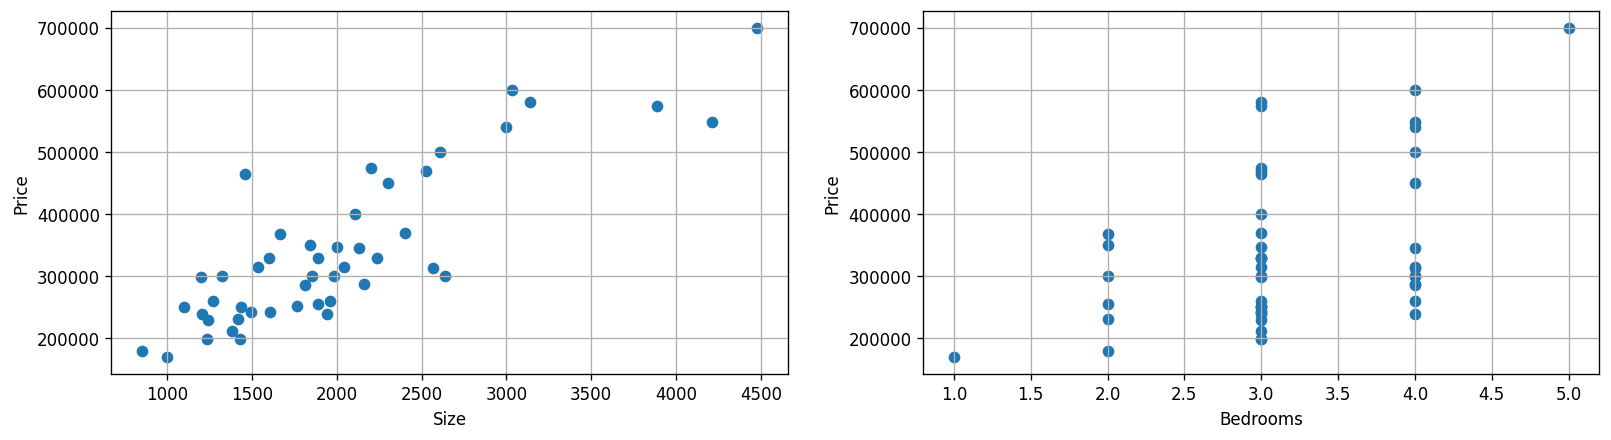

In [162]:
x1 = data['Size'].to_numpy()
x2 = data['Bedrooms'].to_numpy()
y = data['Price'].to_numpy()

n = x1.shape[0]
ones = np.ones(n)
ones = ones.reshape(n, 1)
x1 = x1.reshape(n, 1)
x2 = x2.reshape(n, 1)

Y = y.reshape(n, 1)
X = np.concatenate((ones, x1, x2), axis=1)
B = np.linalg.inv(X.T @ X) @ X.T @ Y
print(f'Model is \n yhat = {B[0]} + {B[1]}*x1 + {B[2]}*x2')

def model(x1, x2):
    yhat = B[0] + B[1]*x1 + B[2]*x2
    return yhat

yhat = model(x1, x2)

fig, axis = plt.subplots(1, 2, figsize=(16, 4), dpi=120)
axis[0].scatter(x1, y)
axis[0].grid()
axis[0].set(xlabel='Size', ylabel='Price')
axis[1].scatter(x2, y)
axis[1].grid()
axis[1].set(xlabel='Bedrooms', ylabel='Price')
plt.show()

#### B) Find the coeﬀicient of determination

In [163]:
y = Y

S_r = sum((y-yhat) ** 2)

ybar = np.average(y)
S_t = sum((y-ybar) ** 2)

r2 = (S_t - S_r)/S_t

print(f'Coefficient of Determination: r2 = {r2}')

Coefficient of Determination: r2 = [0.73294502]


#### C) Use the model to predict the price of a house with an area of 1650 square feet and has 3 bedrooms

In [164]:
x1 = 1650
x2 = 3
yhat = model(x1, x2)
print(f'Predict: Price = {yhat}')

Predict: Price = [293081.4643349]


------------------
## Problem 02

Use the dataset ```data_startups.csv```, to answer the following questions.

This dataset contains information of 50 startups. Features include R&D Spend, Administration, Marketing Spend, State, and finally, Profit.

#### A) Find a regression model to predict the profit.

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


data = pd.read_csv('data_startups.csv')
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


Model is 
 yhat = [50122.19298986] + [0.80571505]*x1 + [-0.02681597]*x2 + [0.02722806]*x3


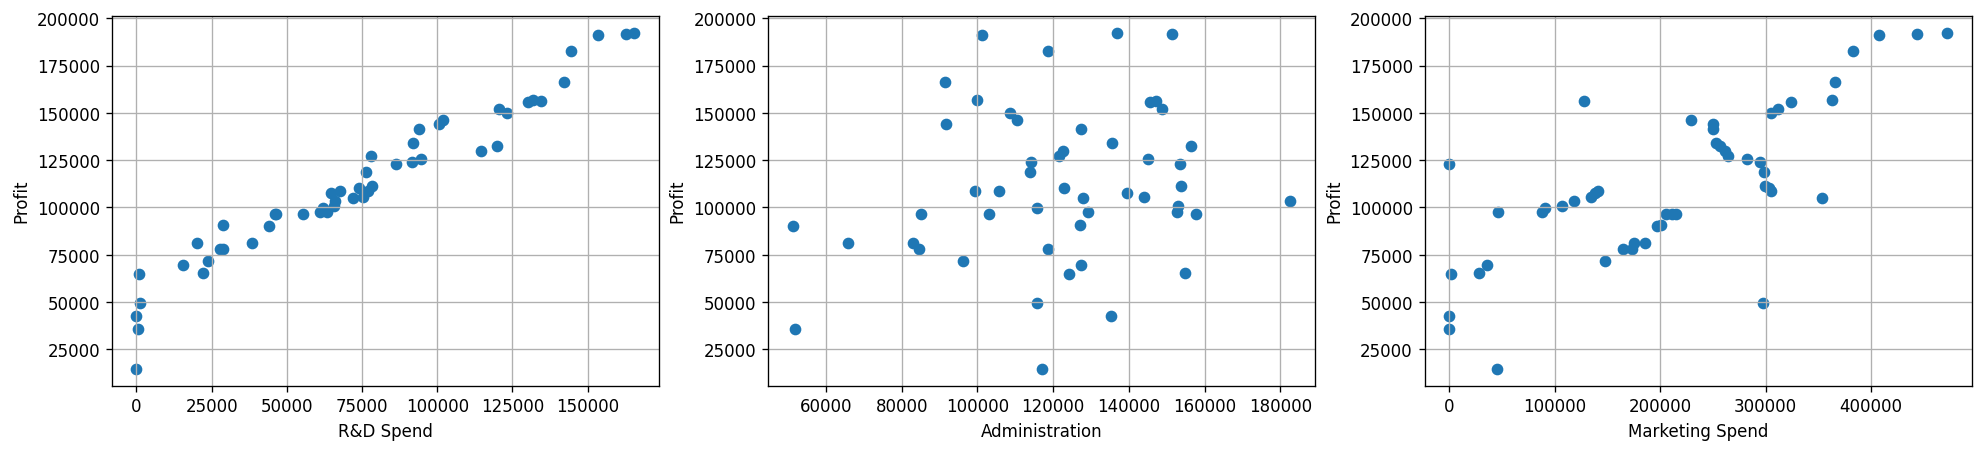

In [26]:
x1 = data['R&D Spend'].to_numpy()
x2 = data['Administration'].to_numpy()
x3 = data['Marketing Spend'].to_numpy()
y = data['Profit'].to_numpy()

n = x1.shape[0]
ones = np.ones(n)
ones = ones.reshape(n, 1)
x1 = x1.reshape(n, 1)
x2 = x2.reshape(n, 1)
x3 = x3.reshape(n, 1)

Y = y.reshape(n, 1)
X = np.concatenate((ones, x1, x2, x3), axis=1)
B = np.linalg.inv(X.T @ X) @ X.T @ Y
print(f'Model is \n yhat = {B[0]} + {B[1]}*x1 + {B[2]}*x2 + {B[3]}*x3')

def model(x1, x2, x3):
    yhat = B[0] + B[1]*x1 + B[2]*x2 + B[3]*x3
    return yhat

yhat = model(x1, x2, x3)

fig, axis = plt.subplots(1, 3, figsize=(20, 4), dpi=120)
axis[0].scatter(x1, y)
axis[0].grid()
axis[0].set(xlabel='R&D Spend', ylabel='Profit')
axis[1].scatter(x2, y)
axis[1].grid()
axis[1].set(xlabel='Administration', ylabel='Profit')
axis[2].scatter(x3, y)
axis[2].grid()
axis[2].set(xlabel='Marketing Spend', ylabel='Profit')
plt.show()

#### B) Find the coeﬀicient of determination

In [27]:
y = Y
S_r = sum((y-yhat) ** 2)

ybar = np.average(y)
S_t = sum((y-ybar) ** 2)

r2 = (S_t - S_r)/S_t

print(f'Coefficient of Determination: r2 = {r2}')

Coefficient of Determination: r2 = [0.95074599]


#### C) Use the model to predict weight of fish from the dataset ```data_startups_unkown.csv```.

In [28]:
data_unk = pd.read_csv('data_startups_unknown.csv')
data_unk

,R&D Spend,Administration,Marketing Spend
0,83412.50,150514.25,45644.55
1,45493.95,123057.49,204634.81
2,15493.95,603057.80,14634.20


In [34]:
x1 = data_unk['R&D Spend'].to_numpy()
x2 = data_unk['Administration'].to_numpy()
x3 = data_unk['Marketing Spend'].to_numpy()
yhat = model(x1, x2, x3)

#.join เป็น method ใช้คั่นระหว่างแต่ละ String
formatted_yhat = ", ".join([f'{val:.2f} profit' for val in yhat])

print(f'Predict: Profit = {formatted_yhat}')

Predict: Profit = 114535.53 profit, 89049.26 profit, 46832.78 profit


------------------
## Problem 03

Use the dataset ```data_fish.csv```, to answer the following questions.

This dataset is a record of 7 common different fish species in fish market sales. With this dataset, a predictive model can be performed using machine friendly data and estimate the weight of fish can be predicted.

- Species: species name of fish
- Weight: weight of fish in Gram g
- Length1: vertical length in cm
- Length2: diangonal length in cm
- Length3: cross length in cm
- Heigth: height in cm
- Width: diangonal width in cm

#### A) Find a regression model to predict the fish weight.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


data = pd.read_csv('data_fish.csv')
data

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
151,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
152,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
153,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
154,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


Model is 
 yhat = [-498.25936439] + [64.66290857]*x1 + [-9.38149073]*x2 + [-28.55895148]*x3 + [27.59351234]*x4 + [25.07173661]*x5


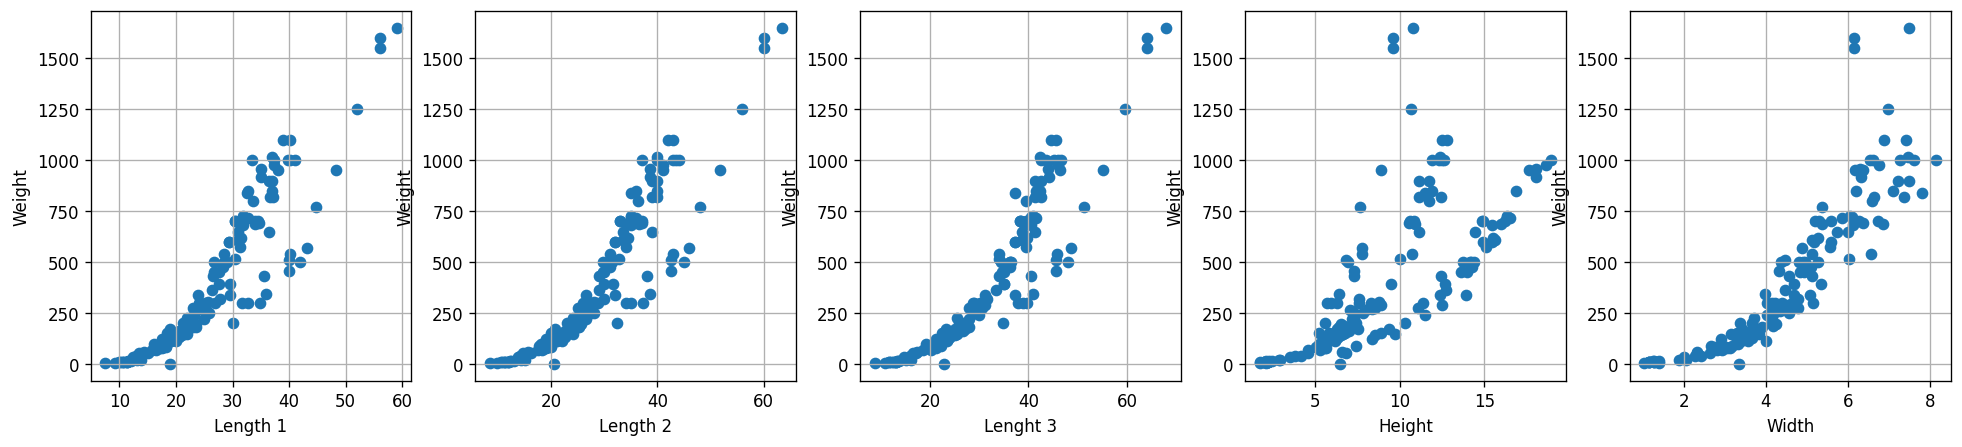

In [18]:
x1 = data['Length1'].to_numpy()
x2 = data['Length2'].to_numpy()
x3 = data['Length3'].to_numpy()
x4 = data['Height'].to_numpy()
x5 = data['Width'].to_numpy()
y = data['Weight'].to_numpy()

n = x1.shape[0]
ones = np.ones(n)
ones = ones.reshape(n, 1)
x1 = x1.reshape(n, 1)
x2 = x2.reshape(n, 1)
x3 = x3.reshape(n, 1)
x4 = x4.reshape(n, 1)
x5 = x5.reshape(n, 1)

Y = y.reshape(n, 1)
X = np.concatenate((ones, x1, x2, x3, x4, x5), axis=1)
B = np.linalg.inv(X.T @ X) @ X.T @ Y
print(f'Model is \n yhat = {B[0]} + {B[1]}*x1 + {B[2]}*x2 + {B[3]}*x3 + {B[4]}*x4 + {B[5]}*x5')

def model(x1, x2, x3, x4, x5):
    yhat = B[0] + B[1]*x1 + B[2]*x2 + B[3]*x3 + B[4]*x4 + B[5]*x5
    return yhat

yhat = model(x1, x2, x3, x4, x5)

fig, axis = plt.subplots(1, 5, figsize=(20, 4), dpi=120)
axis[0].scatter(x1, y)
axis[0].grid()
axis[0].set(xlabel='Length 1', ylabel='Weight')

axis[1].scatter(x2, y)
axis[1].grid()
axis[1].set(xlabel='Length 2', ylabel='Weight')

axis[2].scatter(x3, y)
axis[2].grid()
axis[2].set(xlabel='Lenght 3', ylabel='Weight')

axis[3].scatter(x4, y)
axis[3].grid()
axis[3].set(xlabel='Height', ylabel='Weight')

axis[4].scatter(x5, y)
axis[4].grid()
axis[4].set(xlabel='Width', ylabel='Weight')

plt.show()

#### B) Find the coeﬀicient of determination

In [19]:
y = Y
S_r = sum((y-yhat) ** 2)

ybar = np.average(y)
S_t = sum((y-ybar) ** 2)

r2 = (S_t - S_r)/S_t

print(f'Coefficient of Determination: r2 = {r2}')

Coefficient of Determination: r2 = [0.88392729]


#### C) Use the model to predict weight of fish from the dataset ```data_fish_unkown.csv```.

In [20]:
data_unk = pd.read_csv('data_fish_unknown.csv')
data_unk

,Length1,Length2,Length3,Height,Width
0,36.2,39.5,45.3,18.7542,6.7497
1,21.1,22.5,25.0,6.4000,3.8000
2,32.0,34.5,36.5,10.2565,6.3875


In [24]:
x1 = data_unk['Length1'].to_numpy()
x2 = data_unk['Length2'].to_numpy()
x3 = data_unk['Length3'].to_numpy()
x4 = data_unk['Height'].to_numpy()
x5 = data_unk['Width'].to_numpy()
yhat = model(x1, x2, x3, x4, x5)
formatted_yhat = ", ".join([f'{val:.2f} grams' for val in yhat])

print(f'Predict: Weight = {formatted_yhat}')

Predict: Weight = 864.97 grams, 212.94 grams, 648.05 grams
